# stripplot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Функция `sns.stripplot()` в библиотеке *seaborn* используется для создания точечных графиков, где точки располагаются в ряд, чтобы показать распределение значений в каждой категории. Этот вид графика полезен для визуализации распределения категориальных данных и сравнения разных категорий. В отличие от *swarmplot*, при построении графика *stripplot*, точки могут накладываться друг на друга, особенно при большом количестве данных.

Рассмотрим работу функции sns.stripplot() на примере датасета `'mpg'`. Загрузим этот датасет, удалив пропущенные значения и марки автомобилей с трёх- и пятицилиндровыми двигателями:

In [3]:
df = sns.load_dataset('mpg').dropna()
df = df[df['cylinders'].isin([4, 6, 8])]

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           385 non-null    float64
 1   cylinders     385 non-null    int64  
 2   displacement  385 non-null    float64
 3   horsepower    385 non-null    float64
 4   weight        385 non-null    int64  
 5   acceleration  385 non-null    float64
 6   model_year    385 non-null    int64  
 7   origin        385 non-null    object 
 8   name          385 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.1+ KB


Содержание датафрейма:
- `'mpg'`: расход топлива, измеренный в милях на галлон (miles per gallon);
- `'cylinders'`: количество цилиндров в двигателе;
- `'displacement'`: объем двигателя, измеренный в кубических дюймах;
- `'horsepower'`: мощность двигателя, измеренная в лошадиных силах;
- `'weight'`: вес автомобиля в фунтах;
- `'acceleration'`: время разгона с 0 до 60 миль в час, измеренное в секундах;
- `'model_year'`: год выпуска модели автомобиля;
- `'origin'`: страна происхождения автомобиля (США, Европа, Япония);
- `'name'`: название модели автомобиля.

Применив функцию `sns.stripplot()`, посмотрим на распределение моделей авто по лошадиным силам:

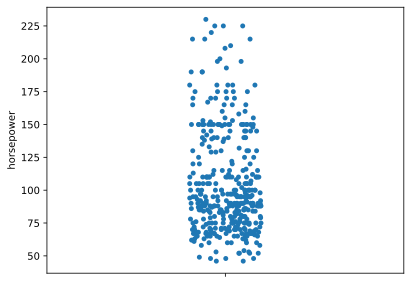

In [5]:
sns.stripplot(df['horsepower']);

Горизонтальное отображение этого же графика:

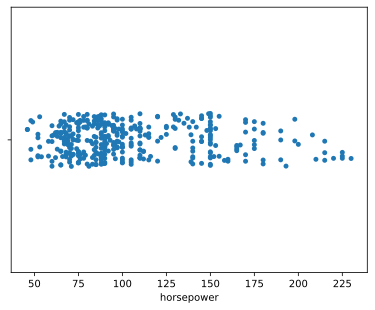

In [6]:
sns.stripplot(df['horsepower'],
              orient='h');

Добавим категориальную переменную и создадим диаграмму, отображающую распределение значений мощности (`horsepower`) в зависимости от региона происхождения автомобилей (`origin`). И воспользуемся параметром `hue` для раскраски точек по региону происхождения:

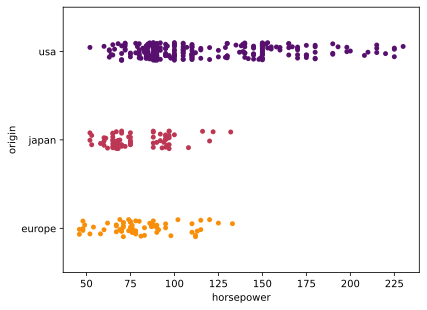

In [7]:
sns.stripplot(x='horsepower', y='origin', data=df,
              palette='inferno', hue='origin');

Параметру `hue` мы также можем передать и количественную переменную. Например, построим график с параметром `hue='horsepower'`, чтобы точки окрашивались в зависимости от значений мощности автомобиля:

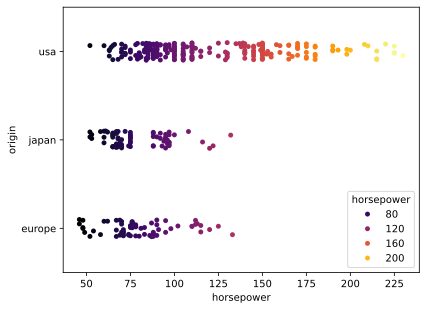

In [8]:
sns.stripplot(x='horsepower', y='origin', data=df,
              palette='inferno', hue='horsepower');

Как можете заметить, в данном случае цветовая палитра меняется равномерно, а не дискретно. Этот эффект более заметен на "одноцветной" палитре:

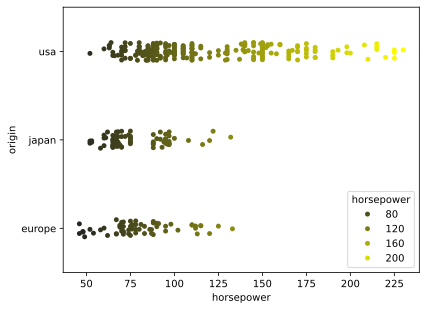

In [9]:
sns.stripplot(x='horsepower', y='origin', data=df,
              palette='dark:yellow', 
              hue='horsepower');

С увеличением мощности, точки на графике приобретают всё более светлые оттенки.

**Параметр dodge**

Как и в других функциях *seaborn*, параметр `dodge` в функции `sns.stripplot` отвечает за визуальное отделение подкатегорий данных друг от друга.

Для примера посмотрим на распределение мощности, в зависимости от числа цилиндров в двигателе:

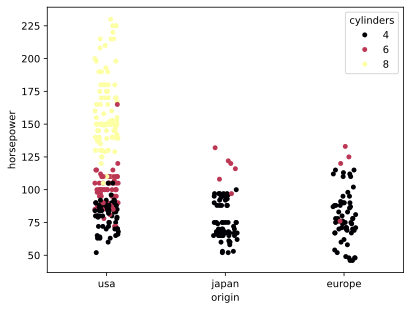

In [10]:
sns.stripplot(x='origin', y='horsepower', data=df,
              palette='inferno', 
              hue='cylinders');

В данном случае может быть полезно визуально отделить подкатегории друг от друга, что и сделаем при помощи параметра `dodge=True`:

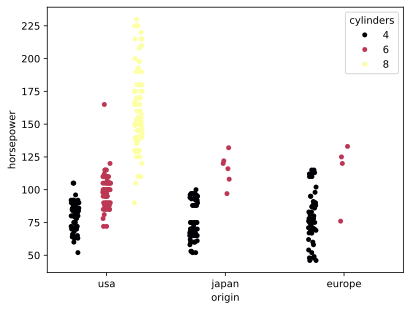

In [11]:
sns.stripplot(x='origin', y='horsepower', data=df,
              palette='inferno', 
              hue='cylinders',
              dodge=True);

**Параметр jitter**

Следующий параметр функции `sns.stripplot()`, который мы рассмотрим - это параметр `jitter`, управляющий степенью случайного шума, который добавляется к позициям точек на графике, чтобы избежать их наложения и лучше визуализировать плотность данных.

Когда точки на графике имеют одинаковые значения и накладываются друг на друга, добавление небольшого случайного смещения по горизонтальной оси (или по вертикальной оси, если stripplot построен горизонтально) помогает сделать каждую точку видимой.

Возможные значения параметра:
- `jitter=True` включает добавление случайного шума с заданной по умолчанию величиной смещения.
- `jitter=False` выключает добавление случайного шума, и точки накладываются друг на друга, если имеют одинаковые значения.
- `jitter=<число>` задает конкретную величину смещения.

`jitter=False`:

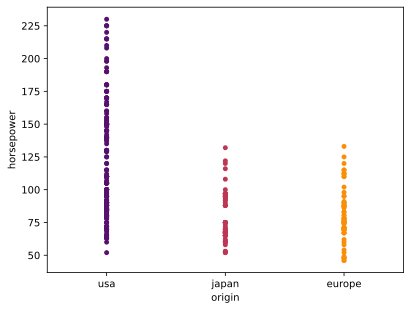

In [12]:
sns.stripplot(x='origin', y='horsepower', data=df,
              palette='inferno', 
              hue='origin',
              jitter=False);

В данном случае, мы, по сути, получаем аналог графика *scatterplot*:

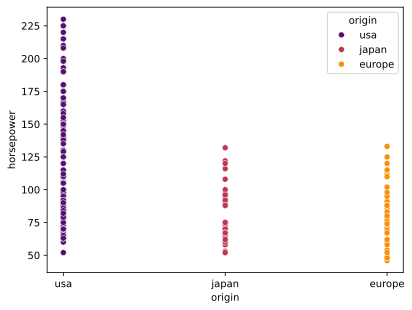

In [13]:
sns.scatterplot(x='origin', y='horsepower', data=df,
              palette='inferno', 
              hue='origin');

Немного расширим полосы с данными, jitter=0.05:

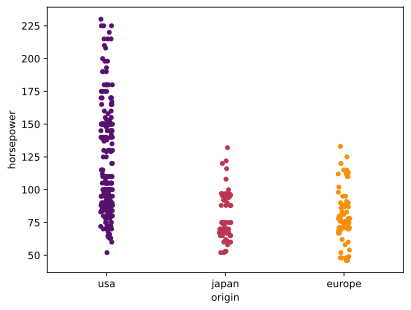

In [14]:
sns.stripplot(x='origin', y='horsepower', data=df,
              palette='inferno', 
              hue='origin',
              jitter=0.05);

Сделаем широкими полосы данных с минимальным наложением точек, `jitter=0.3`:

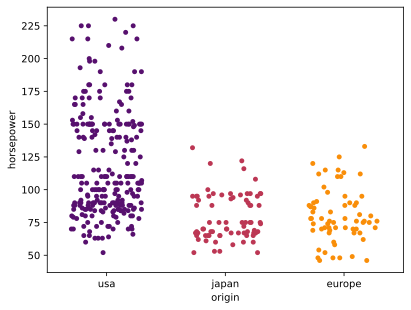

In [15]:
sns.stripplot(x='origin', y='horsepower', data=df,
              palette='inferno', 
              hue='origin',
              jitter=0.3);

Параметром `alpha` "подсветим" места, где всё-таки еще присутствует наложение точек друг на друга:

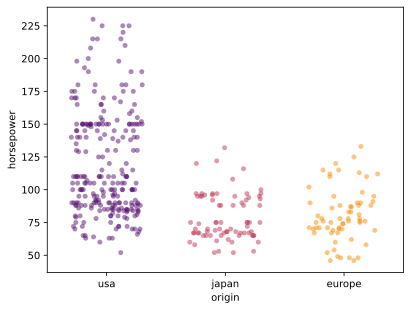

In [16]:
sns.stripplot(x='origin', y='horsepower', data=df,
              palette='inferno', 
              hue='origin',
              jitter=0.3,
              alpha=0.5);

Для управления маркерами в функции `sns.stripplot()` есть параметры: `size`, `linewidth`, `edgecolor`, `marker.`

Увеличение размера точки на графике:


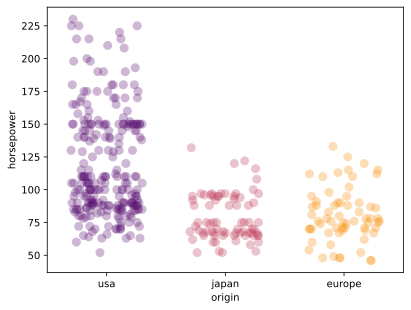

In [17]:
sns.stripplot(x='origin', y='horsepower', data=df,
              palette='inferno', 
              hue='origin',
              alpha=0.3,
              jitter=0.3,
              size=9);

Отражение внешней границы маркера:

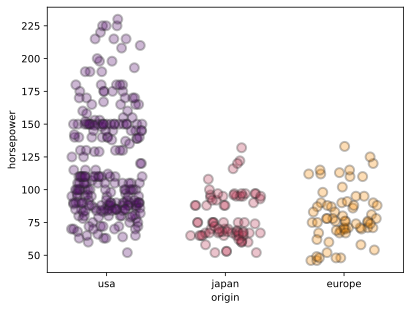

In [18]:
sns.stripplot(x='origin', y='horsepower', data=df,
              palette='inferno', 
              hue='origin',
              alpha=0.3,
              jitter=0.3,
              size=9,
              linewidth=2);

Изменение цвета внешней границы:

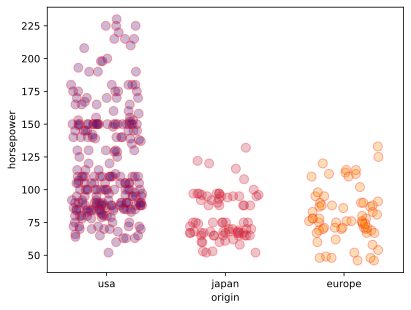

In [19]:
sns.stripplot(x='origin', y='horsepower', data=df,
              palette='inferno', 
              hue='origin',
              alpha=0.3,
              jitter=0.3,
              size=9,
              linewidth=1,
              edgecolor='red');

Изменение внешнего вида маркера:

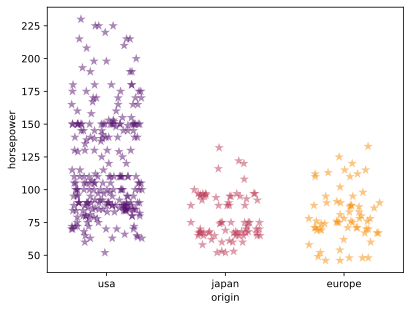

In [20]:
sns.stripplot(x='origin', y='horsepower', data=df,
              palette='inferno', 
              hue='origin',
              alpha=0.5,
              jitter=0.3,
              size=10,
              marker='*');

Если "звёздочку" поместить между двумя символами доллара, то маркеры на графике отобразятся в виде шестиконечной снежинки:

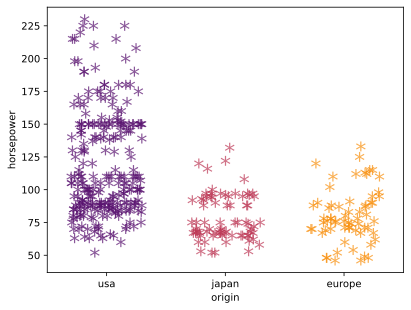

In [21]:
sns.stripplot(x='origin', y='horsepower', data=df,
              palette='inferno', 
              hue='origin',
              alpha=0.7,
              jitter=0.3,
              size=10,
              marker='$*$');

Символы доллара всеядные - "переварят" и смайлики 😊 :

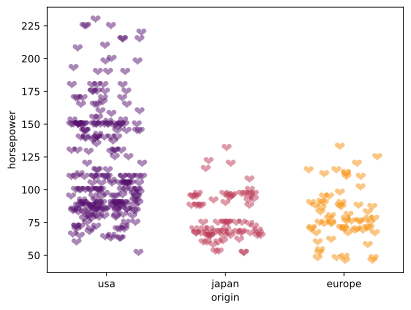

In [22]:
sns.stripplot(x='origin', y='horsepower', data=df,
              palette='inferno', 
              hue='origin',
              alpha=0.5,
              jitter=0.3,
              size=10,
              marker='$❤️$');